In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file='iag_2021.csv'
data=pd.read_csv(file,parse_dates=['hora'],index_col=['hora'])

In [145]:
new_dates=pd.date_range('2021-01-04 09:00:26',periods=len(data),freq='S')
data.index=new_dates

In [146]:
data.index

DatetimeIndex(['2021-01-04 09:00:26', '2021-01-04 09:00:27',
               '2021-01-04 09:00:28', '2021-01-04 09:00:29',
               '2021-01-04 09:00:30', '2021-01-04 09:00:31',
               '2021-01-04 09:00:32', '2021-01-04 09:00:33',
               '2021-01-04 09:00:34', '2021-01-04 09:00:35',
               ...
               '2021-01-21 01:36:08', '2021-01-21 01:36:09',
               '2021-01-21 01:36:10', '2021-01-21 01:36:11',
               '2021-01-21 01:36:12', '2021-01-21 01:36:13',
               '2021-01-21 01:36:14', '2021-01-21 01:36:15',
               '2021-01-21 01:36:16', '2021-01-21 01:36:17'],
              dtype='datetime64[ns]', length=1442152, freq='S')

In [147]:
data.head(100)

,timestamp,ultimo,volumen
2021-01-04 09:00:26,1.609747e+09,1.8500,873918
2021-01-04 09:00:27,1.609747e+09,1.8375,938976
2021-01-04 09:00:28,1.609747e+09,1.8400,949876
2021-01-04 09:00:29,1.609747e+09,1.8400,949876
2021-01-04 09:00:30,1.609747e+09,1.8300,959545
...,...,...,...
2021-01-04 09:02:01,1.609747e+09,1.8295,1200569
2021-01-04 09:02:02,1.609747e+09,1.8295,1200569
2021-01-04 09:02:03,1.609747e+09,1.8295,1200569
2021-01-04 09:02:04,1.609747e+09,1.8295,1200569


In [148]:
data=data.drop_duplicates()
data=data.asfreq('S') #Definimos una escala temporal de día. 
#data=data.dropna() #En la operación anterior se han generado nulos, los eliminamos.

In [149]:
target='ultimo'

In [150]:
data.index.dtype

dtype('<M8[ns]')

In [151]:
percentage=0.5
cut=int(percentage*len(data))
data_tr=data.iloc[:cut]
data_test=data.iloc[cut+1:]
ts_tr=data_tr[target]
ts_test=data_test[target]
target='ultimo'
print('Lenghts tr/test',len(data_tr),len(data_test))

Lenghts tr/test 721076 721075


In [183]:
60/1.5

40.0

In [185]:
#Extraemos residuo de data_tr
from statsmodels.tsa.seasonal import seasonal_decompose as decompose
ts_log_tr=np.log(data_tr[target])
ts_log_tr=ts_log_tr.dropna()
#freq=df_tr.index.inferred_freq
freq=int(round(8.5*60*40,0))
out=decompose(ts_log_tr,freq=freq)
seasonal_tr=out.seasonal
residuo_tr=out.resid
trend_tr=out.trend

In [206]:
freq

20400

In [186]:
residuo_tr

2021-01-04 09:00:26   NaN
2021-01-04 09:00:27   NaN
2021-01-04 09:00:28   NaN
2021-01-04 09:00:29   NaN
2021-01-04 09:00:30   NaN
                       ..
2021-01-12 17:18:17   NaN
2021-01-12 17:18:18   NaN
2021-01-12 17:18:19   NaN
2021-01-12 17:18:20   NaN
2021-01-12 17:18:21   NaN
Freq: S, Name: ultimo, Length: 721076, dtype: float64

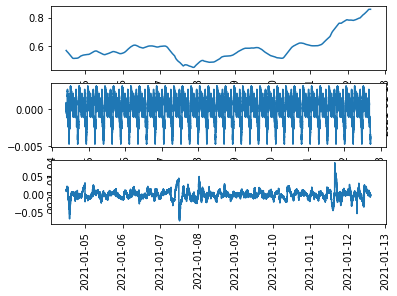

In [187]:
plt.subplot(311)
plt.xticks(rotation='vertical')
plt.plot(trend_tr)
plt.subplot(312)
plt.xticks(rotation='vertical')
plt.plot(seasonal_tr)
plt.subplot(313)
plt.plot(residuo_tr)
plt.xticks(rotation='vertical')
plt.show()

In [199]:
df_tr.head(100)

,serie,serie_log,residuo,residuo_cum,est_log,est_serie
2021-01-04 11:50:26,1.7860,0.579978,0.011250,0.011250,0.591228,1.806205
2021-01-04 11:50:27,1.7860,0.579978,0.011190,0.022440,0.602418,1.826531
2021-01-04 11:50:28,1.7860,0.579978,0.011163,0.033603,0.613582,1.847035
2021-01-04 11:50:29,1.7860,0.579978,0.011169,0.044772,0.624751,1.867781
2021-01-04 11:50:30,1.7860,0.579978,0.011108,0.055880,0.635859,1.888644
...,...,...,...,...,...,...
2021-01-04 11:52:01,1.7865,0.580258,0.011086,1.076148,1.656406,5.240442
2021-01-04 11:52:02,1.7865,0.580258,0.011049,1.087196,1.667454,5.298663
2021-01-04 11:52:03,1.7865,0.580258,0.011074,1.098270,1.678528,5.357664
2021-01-04 11:52:04,1.7865,0.580258,0.011045,1.109314,1.689573,5.417165


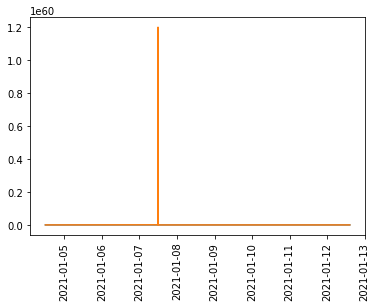

In [198]:
df_tr=pd.DataFrame(data_tr[target].values,index=data_tr.index,columns=['serie'])
df_tr['serie_log']=ts_log_tr.values
df_tr['residuo']=residuo_tr
df_tr=df_tr.dropna()
df_tr['residuo_cum']=df_tr['residuo'].cumsum()
df_tr['est_log']=df_tr['serie_log']+df_tr['residuo_cum']
df_tr['est_serie']=np.exp(df_tr['est_log'])
#df_tr=df_tr[df_tr['est_serie']<1000]
plt.plot(df_tr['serie_log'])
plt.plot(df_tr['est_serie'])
plt.xticks(rotation='vertical')
plt.show()

In [207]:
from sklearn.linear_model import LinearRegression as reg
model=reg()
lag=20400
feat_input='est_serie'
x=[]
y=[]
for k in range(0+lag,len(df_tr)):
    x_value=df_tr['serie'].iloc[k-lag:k].ravel()
    x.append(x_value)
    y_value=df_tr['serie'].iloc[k]
    y.append(y_value)
model.fit(x,y)
pred=model.predict(x)
#df_tr['pred']=pred

plt.plot(y[0:500])
plt.plot(pred[0:500])
rmse=np.mean((y-pred)**2)
rmse=np.sqrt(rmse)
print('Error cuadrático medio',rmse)



MemoryError: Unable to allocate array with shape (680276, 20400) and data type float64

Error cuadrático medio 0.0006362640575688065


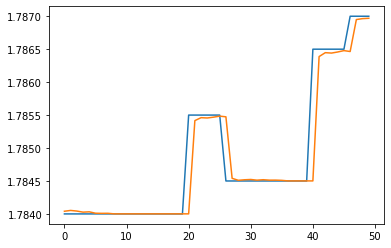

In [205]:
plt.plot(y[100:150])
plt.plot(pred[100:150])
rmse=np.mean((y-pred)**2)
rmse=np.sqrt(rmse)
print('Error cuadrático medio',rmse)